In [113]:
#Importing Libraries--
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("NetflixBC.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [58]:
#Length of df
len(df)

8807

In [59]:
#Checking the datatype
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [60]:
#Number of unique values in our data
for i in df.columns:
  print(i,":",df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [61]:
#Checking total null values in every columns of the data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [62]:
# Drop show_id as it is of no use for us
df.drop(columns="show_id",inplace=True)


In [63]:
df.dropna(subset=["date_added"],inplace=True)
df["date_added"].isna().sum()

0

In [64]:
df.dropna(subset=["rating"],inplace=True)
df["rating"].isna().sum()

0

In [65]:
df.dropna(subset=["duration"],inplace=True)

In [66]:
df[(df["director"].isna() & df["cast"].isna() & df["country"].isna())].shape[0]

96

In [67]:
df.shape

(8790, 11)

In [68]:
df.dropna(subset=["director","cast","country"],how='all',inplace=True)

In [69]:
df.shape

(8694, 11)

In [70]:
df["date_added"] = pd.to_datetime(df["date_added"])
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [71]:
#Unnesting the Director's column using split and converting it to list
D1 = df['director'].apply(lambda x: str(x).split(",")).tolist()
D1[:11]
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
11,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."


In [72]:
#Unnesting the directors column, i.e- creating separate lines for each director in a movie

d1 = df['director'].apply(lambda x: str(x).split(",")).tolist() #Splitting the names
df_new1 =pd.DataFrame(d1,index=df["title"]) #converting back to DataFrame
df_new1=df_new1.stack() #Stacking the names
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.drop(["level_1"],axis=1,inplace=True)
df_new1.replace('nan',np.NaN,inplace=True)
df_new1.rename({0:'Directors'},axis=1,inplace=True)
df_new1

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Kota Factory,NaN
4,Midnight Mass,Mike Flanagan
...,...,...
9494,Zinzana,Majid Al Ansari
9495,Zodiac,David Fincher
9496,Zombieland,Ruben Fleischer
9497,Zoom,Peter Hewitt


In [73]:
#Unnesting the Cast column, i.e- creating separate lines for each cast in a movie and renaming it as Actors
df_new2 = df["cast"].apply(lambda x: str(x).split(",")).tolist()
df_new2 = pd.DataFrame(df_new2,index=df["title"])
df_new2= df_new2.stack()
df_new2 = pd.DataFrame(df_new2.reset_index())
df_new2.drop("level_1",axis=1,inplace=True)
df_new2.replace('nan',np.NaN,inplace=True)
df_new2.rename({0:"Actors"},axis=1,inplace=True)
df_new2

,title,Actors
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64740,Zubaan,Manish Chaudhary
64741,Zubaan,Meghna Malik
64742,Zubaan,Malkeet Rauni
64743,Zubaan,Anita Shabdish


In [74]:
#Unnesting the Listed_in column, i.e- creating separate lines for each Genre of a movie and renaming it as Genre
df_new3 = df["listed_in"].apply(lambda x: str(x).split(",")).tolist()
df_new3 = pd.DataFrame(df_new3,index=df["title"])
df_new3= df_new3.stack()
df_new3 = pd.DataFrame(df_new3.reset_index())
df_new3.drop("level_1",axis=1,inplace=True)
df_new3.replace('nan',np.NaN,inplace=True)
df_new3.rename({0:"Genre"},axis=1,inplace=True)
df_new3

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19105,Zoom,Children & Family Movies
19106,Zoom,Comedies
19107,Zubaan,Dramas
19108,Zubaan,International Movies


In [75]:
#Unnesting the Listed_in column, i.e- creating separate lines for each Genre of a movie and renaming it as Genre
df_new4 = df["country"].apply(lambda x: str(x).split(",")).tolist()
df_new4 = pd.DataFrame(df_new4,index=df["title"])
df_new4= df_new4.stack()
df_new4 = pd.DataFrame(df_new4.reset_index())
df_new4.drop("level_1",axis=1,inplace=True)
df_new4.replace('nan',np.NaN,inplace=True)
df_new4.rename({0:"Country"},axis=1,inplace=True)
df_new4

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Kota Factory,India
4,Midnight Mass,NaN
...,...,...
10732,Zinzana,Jordan
10733,Zodiac,United States
10734,Zombieland,United States
10735,Zoom,United States


In [76]:
#Merging all the Unnested cols together
df_newa = pd.merge(df_new2,df_new1,on="title")
df_newb = pd.merge(df_newa,df_new3, on="title")
df_newc = pd.merge(df_newb,df_new4, on="title")
df_final = df_newc.merge(df,on="title")
df_final

,title,Actors,Directors,Genre,Country,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,Movie,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201648,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
201649,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
201650,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
201651,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [77]:
df_final.drop(columns = ["director","cast","listed_in","country"],inplace=True)

In [78]:
df_final.isna().sum()

title               0
Actors           1965
Directors       50241
Genre               0
Country         11710
type                0
date_added          0
release_year        0
rating              0
duration            0
description         0
dtype: int64

In [79]:
df_final['rating'] = df_final['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df_final['rating'] = df_final['rating'].replace(['PG-13','TV-14'],'Teens')
df_final['rating'] = df_final['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df_final['rating'] = df_final['rating'].replace(['NR','UR'],np.NaN)
df_final.head()

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,Movie,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [80]:
df_final['rating'].unique()


array(['Teens', 'Adults', 'Kids', nan], dtype=object)

In [81]:
df_final['rating'].isna().sum()


1629

In [82]:
df_final.dropna(subset = ['rating'],inplace=True)
df_final['rating'].isna().sum()

0

In [83]:
df_final["Day"] = df_final["date_added"].dt.day
df_final["Month"] = df_final["date_added"].dt.month
df_final["Year"] = df_final["date_added"].dt.year
df_final["Month_name"] = df_final["date_added"].dt.month_name()
df_final["Week_day"] = df_final["date_added"].dt.day_name()
df_final


,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description,Day,Month,Year,Month_name,Week_day
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,Movie,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201648,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201649,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201650,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201651,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday


In [84]:
df_final = df_final.replace(np.NaN,"Unknow")
df_final

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description,Day,Month,Year,Month_name,Week_day
0,Dick Johnson Is Dead,Unknow,Kirsten Johnson,Documentaries,United States,Movie,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,Blood & Water,Ama Qamata,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,Blood & Water,Ama Qamata,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
3,Blood & Water,Ama Qamata,Unknow,TV Mysteries,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
4,Blood & Water,Khosi Ngema,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201648,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201649,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201650,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201651,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday


In [85]:
df_final.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
Day             0
Month           0
Year            0
Month_name      0
Week_day        0
dtype: int64

In [86]:
df_final.shape

(200024, 16)

In [87]:
df_final.duplicated().sum()

7

In [88]:
df_final.drop_duplicates(keep="first",inplace=True)
df_final

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description,Day,Month,Year,Month_name,Week_day
0,Dick Johnson Is Dead,Unknow,Kirsten Johnson,Documentaries,United States,Movie,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,Blood & Water,Ama Qamata,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,Blood & Water,Ama Qamata,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
3,Blood & Water,Ama Qamata,Unknow,TV Mysteries,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
4,Blood & Water,Khosi Ngema,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201648,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201649,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201650,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201651,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday


In [89]:
df_final.duplicated().sum()

0

Creating 2 more dataframes for better analysis by dividing the present dataframe on the basis of type i.e Movie and TV Show and naming them df_movies and df_tvs.



In [90]:
df_movies = df_final.loc[df_final["type"]=="Movie"]
df_movies

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description,Day,Month,Year,Month_name,Week_day
0,Dick Johnson Is Dead,Unknow,Kirsten Johnson,Documentaries,United States,Movie,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
157,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91 min,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
158,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91 min,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
159,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91 min,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
160,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91 min,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201648,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201649,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201650,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday
201651,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,Movie,2019-03-02,2015,Teens,111 min,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday


In [91]:
df_tv = df_final.loc[df_final["type"]=="TV Show"]
df_tv

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description,Day,Month,Year,Month_name,Week_day
1,Blood & Water,Ama Qamata,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,Blood & Water,Ama Qamata,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
3,Blood & Water,Ama Qamata,Unknow,TV Mysteries,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
4,Blood & Water,Khosi Ngema,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
5,Blood & Water,Khosi Ngema,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201526,Zindagi Gulzar Hai,Javed Sheikh,Unknow,Romantic TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1 Season,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201527,Zindagi Gulzar Hai,Javed Sheikh,Unknow,TV Dramas,Pakistan,TV Show,2016-12-15,2012,Kids,1 Season,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201528,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknow,International TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1 Season,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201529,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknow,Romantic TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1 Season,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday


In [92]:
df_movies["duration"] = df_movies['duration'].str.replace("min","")
df_movies.head()

<ipython-input-92-920be36aeb4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration"] = df_movies['duration'].str.replace("min","")


,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description,Day,Month,Year,Month_name,Week_day
0,Dick Johnson Is Dead,Unknow,Kirsten Johnson,Documentaries,United States,Movie,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
157,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
158,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
159,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
160,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknow,Movie,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday


In [93]:
df_tv['duration'] = df_tv['duration'].str.replace('Seasons',"")
df_tv['duration'] = df_tv['duration'].str.replace('Season',"")
df_tv

<ipython-input-93-67fbb1f860b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration'] = df_tv['duration'].str.replace('Seasons',"")
<ipython-input-93-67fbb1f860b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration'] = df_tv['duration'].str.replace('Season',"")


,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description,Day,Month,Year,Month_name,Week_day
1,Blood & Water,Ama Qamata,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,Blood & Water,Ama Qamata,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
3,Blood & Water,Ama Qamata,Unknow,TV Mysteries,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
4,Blood & Water,Khosi Ngema,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
5,Blood & Water,Khosi Ngema,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201526,Zindagi Gulzar Hai,Javed Sheikh,Unknow,Romantic TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201527,Zindagi Gulzar Hai,Javed Sheikh,Unknow,TV Dramas,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201528,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknow,International TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201529,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknow,Romantic TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday


Here, we are replacing the column duration with a better name season for tv shows only in df_tvs.

In [94]:
df_tv.rename(columns={'duration':'seasons'},inplace=True)
df_tv

<ipython-input-94-827b461a4e78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.rename(columns={'duration':'seasons'},inplace=True)


,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,seasons,description,Day,Month,Year,Month_name,Week_day
1,Blood & Water,Ama Qamata,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,Blood & Water,Ama Qamata,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
3,Blood & Water,Ama Qamata,Unknow,TV Mysteries,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
4,Blood & Water,Khosi Ngema,Unknow,International TV Shows,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
5,Blood & Water,Khosi Ngema,Unknow,TV Dramas,South Africa,TV Show,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201526,Zindagi Gulzar Hai,Javed Sheikh,Unknow,Romantic TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201527,Zindagi Gulzar Hai,Javed Sheikh,Unknow,TV Dramas,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201528,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknow,International TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday
201529,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknow,Romantic TV Shows,Pakistan,TV Show,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday


We are ready with out dataframes, and also ready to begin our EDA!¶


In [95]:
print(df_final["release_year"].min())
print(df_final["release_year"].max())

1942
2021


In [96]:
 #df_final.shape[0]

In [97]:
print("Movie :",df_final[df_final["type"]=="Movie"].shape[0])
print("Shows :",df_final[df_final["type"]=="TV Show"].shape[0])

Movie : 144362
Shows : 55655


In [98]:
df_final['Directors'].nunique() #There are a total of 4925 directors present in the data


5053

In [99]:
df_final['Actors'].nunique() #There are a total of 36148 actors present in the data.


38977

In [100]:
df_final['Country'].nunique() #The content is distributed across 127 countries.


197

Lets start our visualisation with seeing the distribution of content on Netflix.



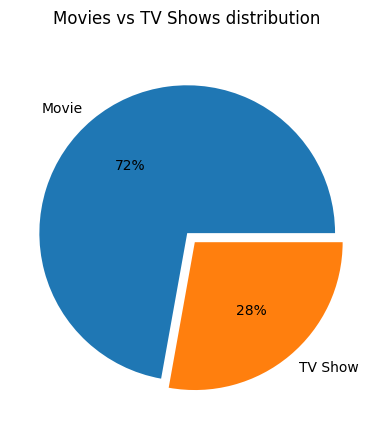

In [101]:
labels = ['Movie', 'TV Show']
plt.pie(df_final.groupby('type')['type'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
plt.suptitle('Movies vs TV Shows distribution')
plt.show()
#Netflix has 70% of its content as movies.
#TV Shows are clearly lesser than Movies.

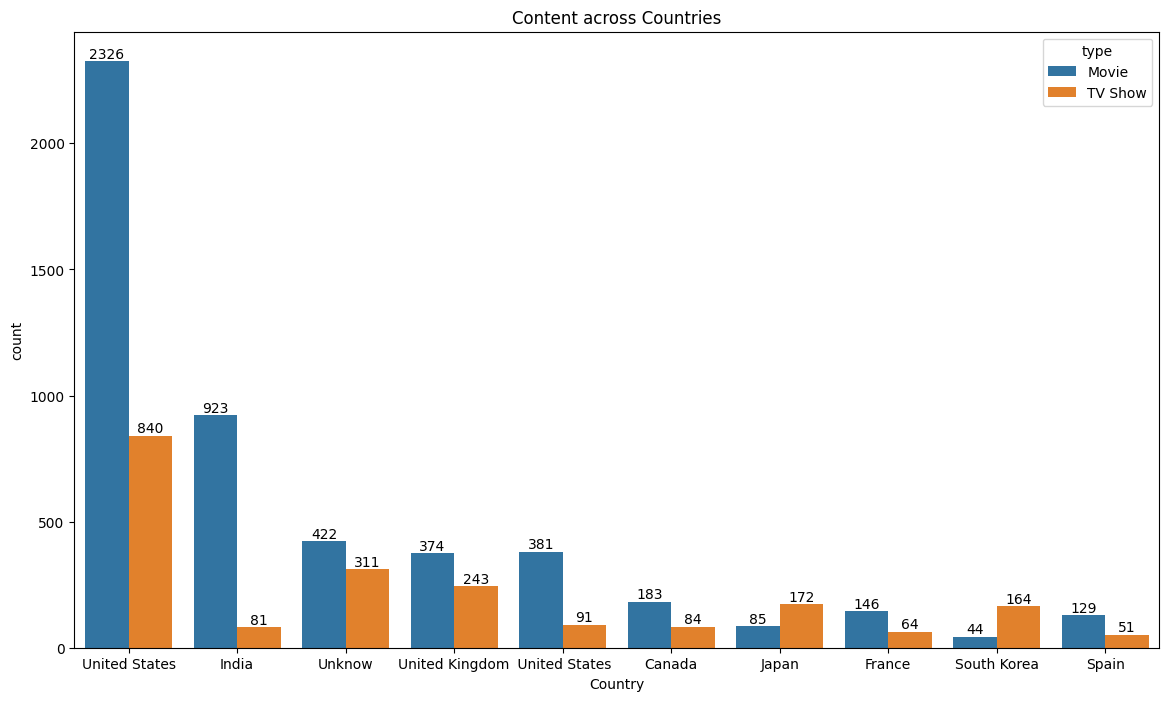

In [102]:
df_temp = df_final.drop_duplicates(subset=["Country","title"])
x = df_temp['Country'].value_counts().head(10)

plt.figure(figsize = (14,8))
plt.title('Content across Countries')
label = sns.countplot(data = df_temp, x = 'Country', hue = 'type', order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()

Lets see the top 10 Directors.



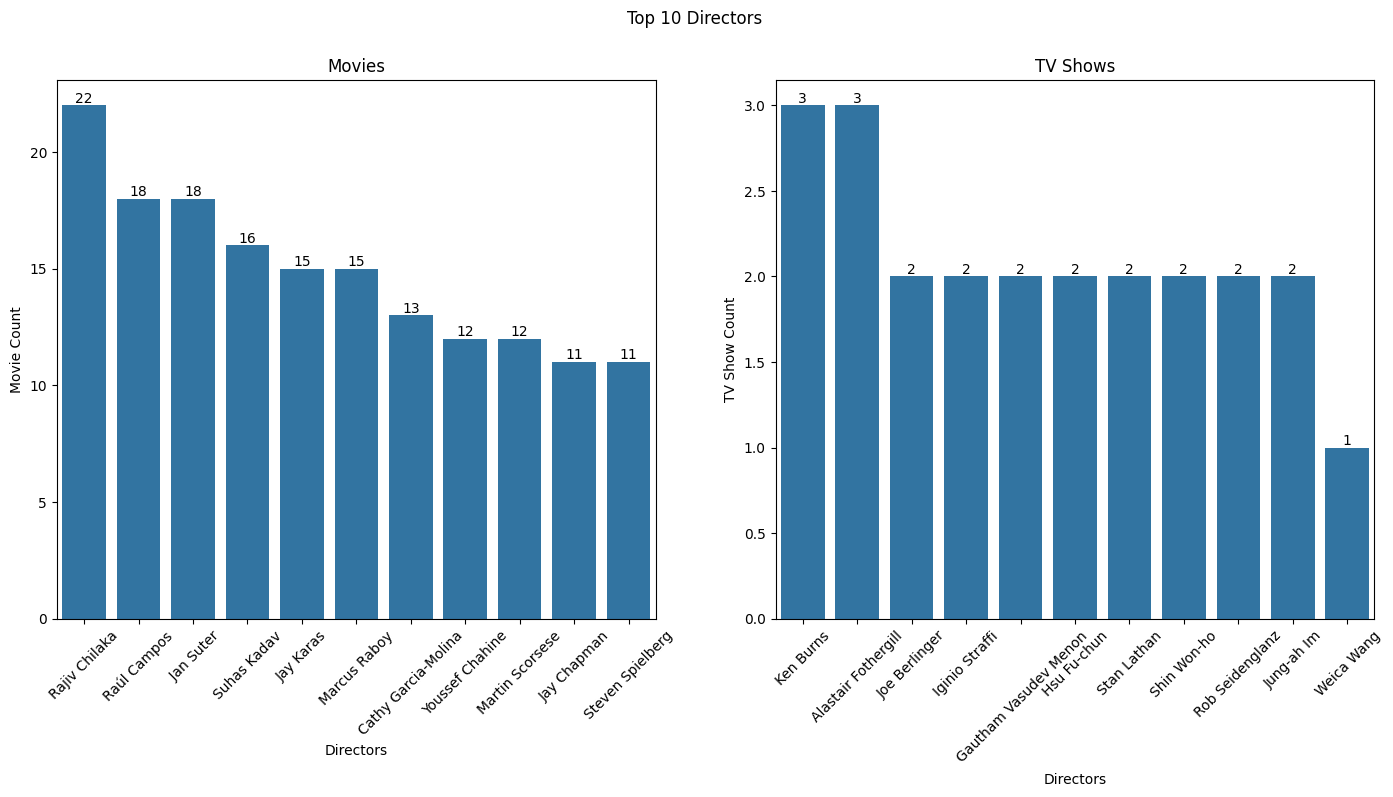

In [103]:
df_movies_temp = df_movies.drop_duplicates(subset = ['Directors','title'])
df_tvs_temp = df_tv.drop_duplicates(subset = ['Directors','title'])
plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Directors')

#For Movies
plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='Directors', order = df_movies_temp['Directors'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

#For Tv sHOWS
plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='Directors', order = df_tvs_temp['Directors'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')

plt.show()

Lets see the top 10 Genres



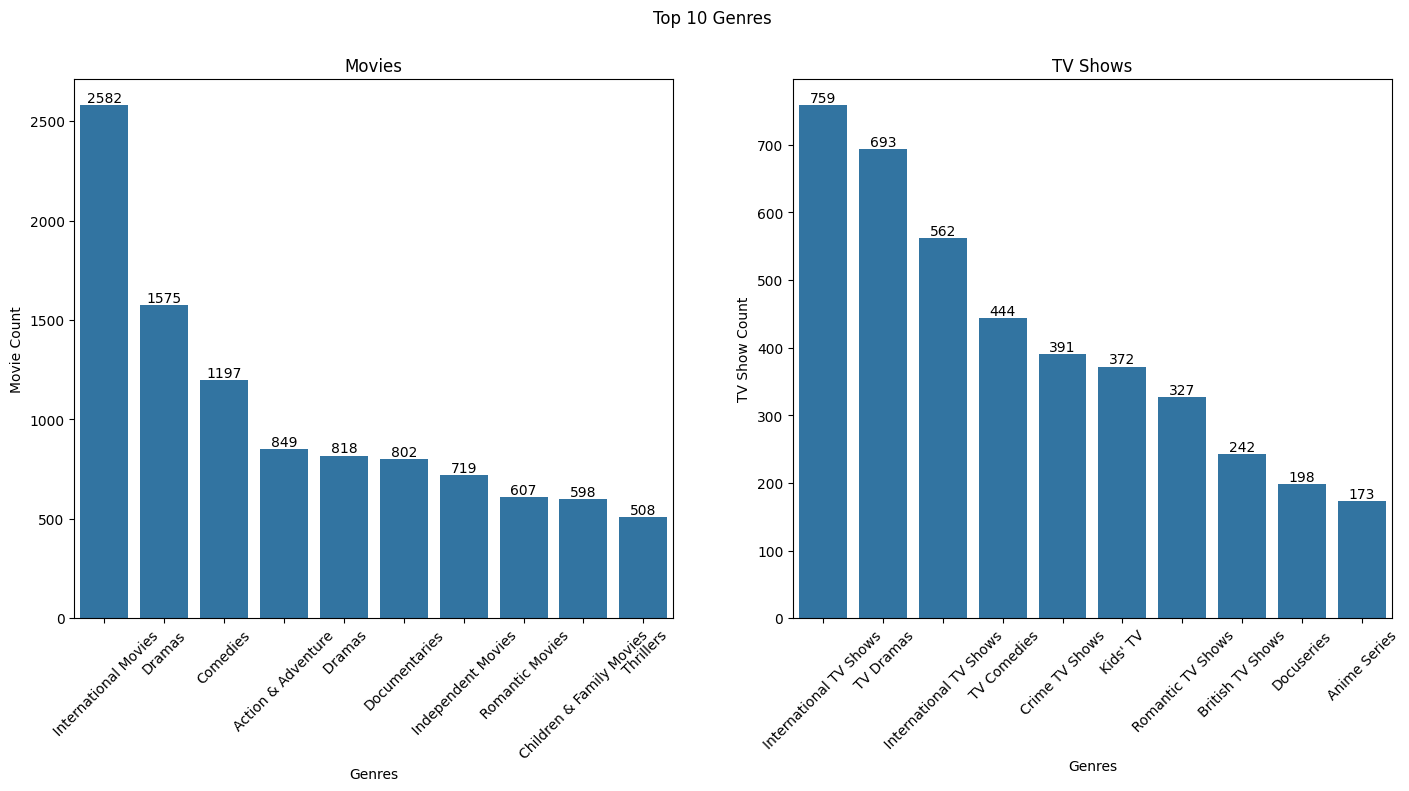

In [104]:
df_movies_temp = df_movies.drop_duplicates(subset = ['Genre','title'])
df_tvs_temp = df_tv.drop_duplicates(subset = ['Genre','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data= df_movies_temp, x='Genre', order = df_movies_temp['Genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='Genre', order = df_tvs_temp['Genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

Now, lets see when does netflix add movies and tv shows the most



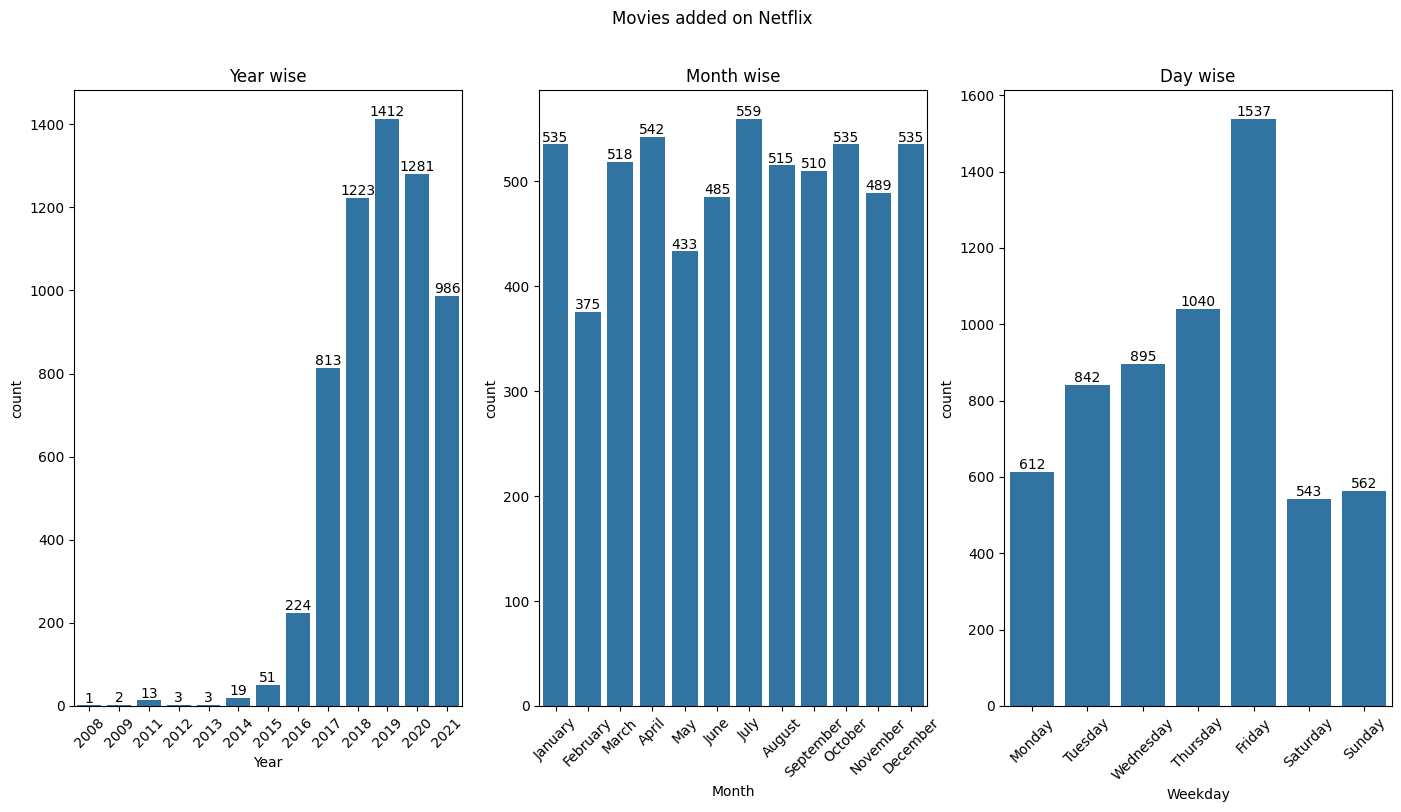

In [105]:
df_movies_temp = df_movies.drop_duplicates(subset = ['Year','title'])


mv_year = df_movies_temp['Year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['Month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['Week_day'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='Year', order = mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='Month_name', order = mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='Week_day', order = mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

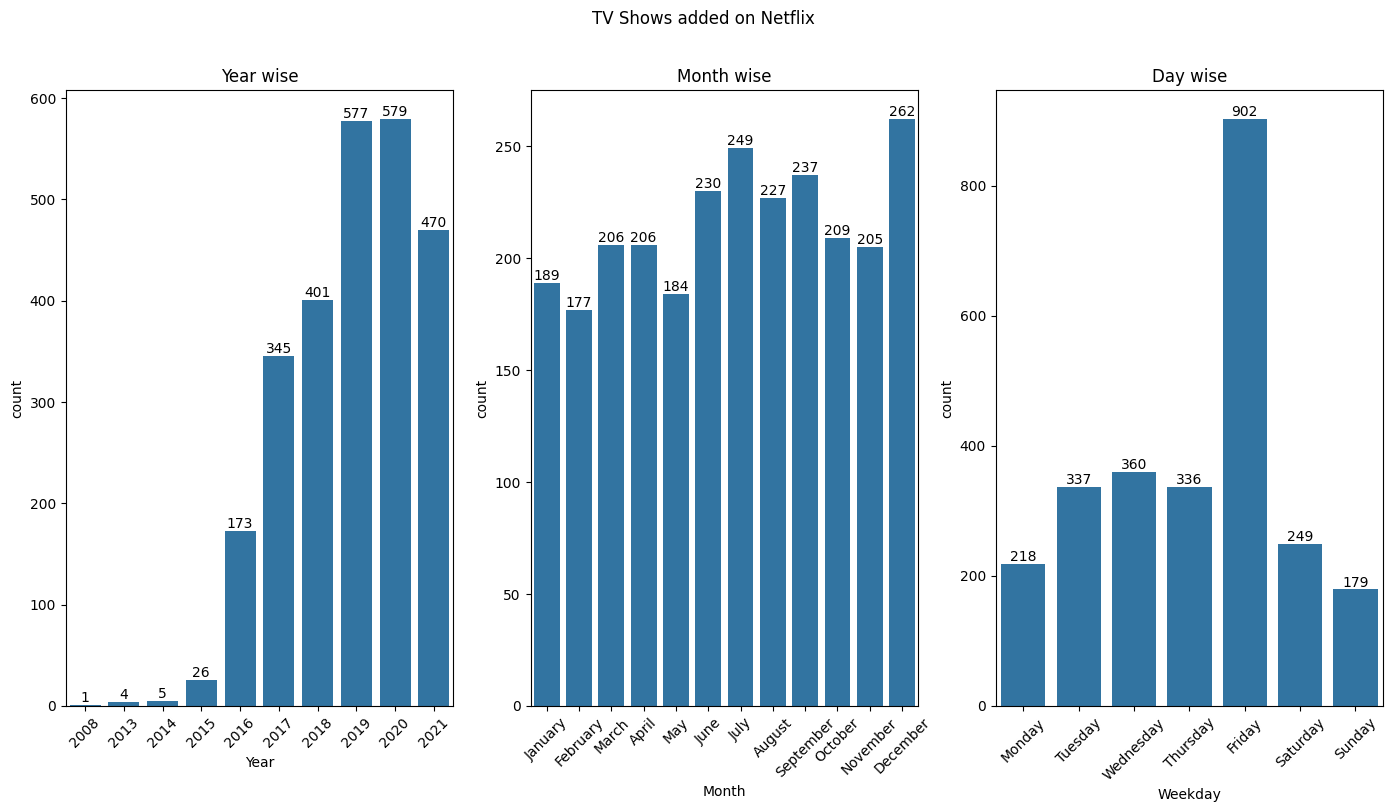

In [106]:
df_tvs_temp = df_tv.drop_duplicates(subset = ['Year','title'])

tv_year = df_tvs_temp['Year'].value_counts()
tv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tv_month = df_tvs_temp['Month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = df_tvs_temp['Week_day'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_tvs_temp, x='Year', order = tv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvs_temp, x='Month_name', order = tv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_tvs_temp, x='Week_day', order = tv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

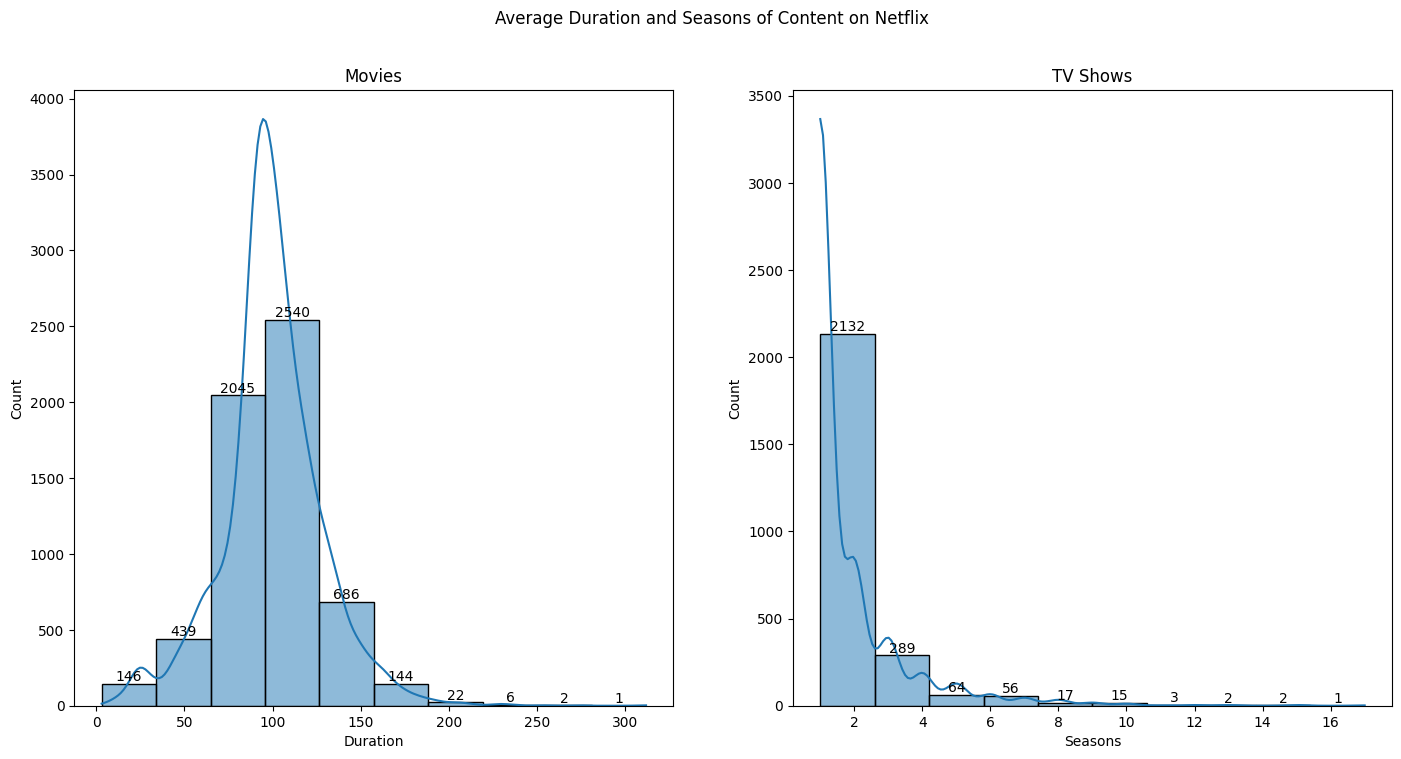

In [107]:
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tvs_temp = df_tv.drop_duplicates(subset = ['seasons','title'])


plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label = sns.histplot(df_movies_temp['duration'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label = sns.histplot(df_tvs_temp['seasons'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

<ipython-input-108-5a1cb99215a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
<ipython-input-108-5a1cb99215a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)


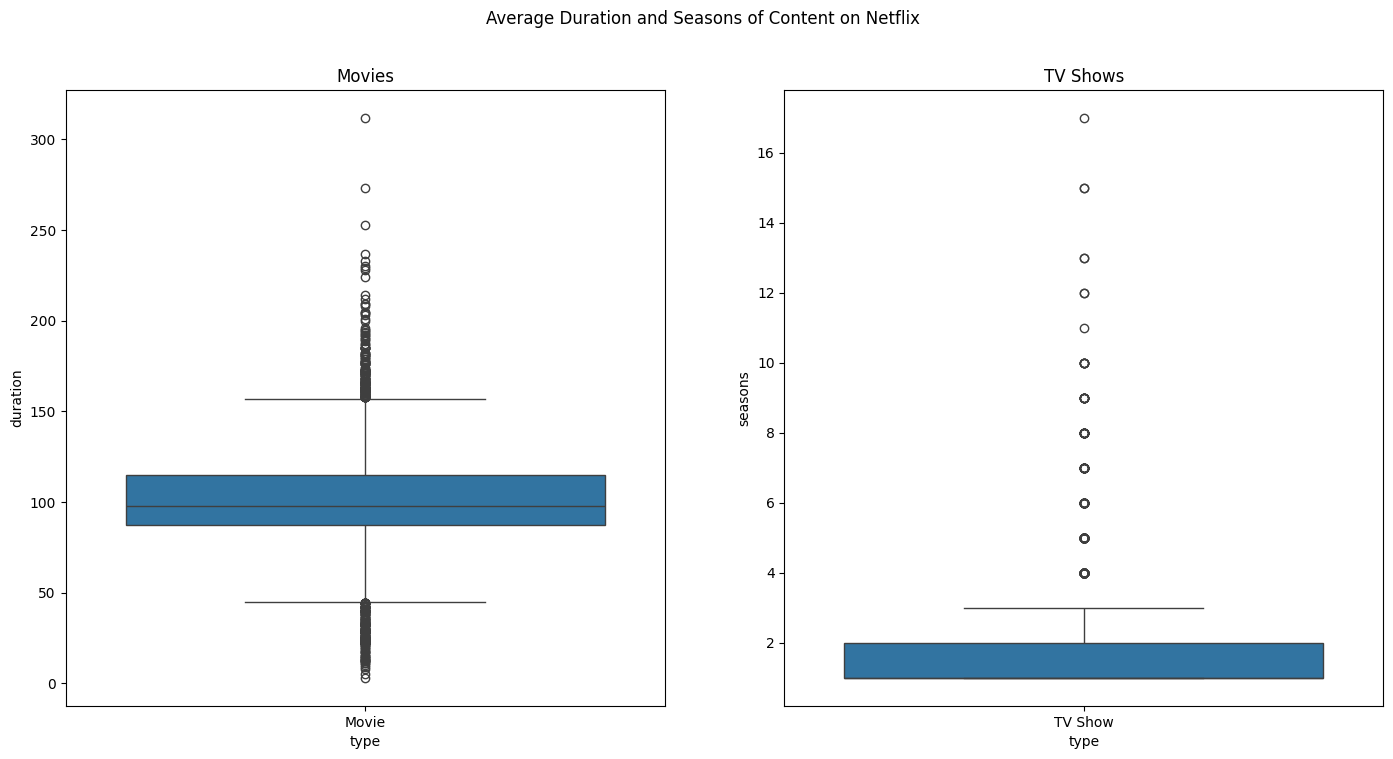

In [108]:
df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp, x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp, x='type', y='seasons')
plt.title('TV Shows')

plt.show()

Lets see most active actors for movies and tv shows seperately.



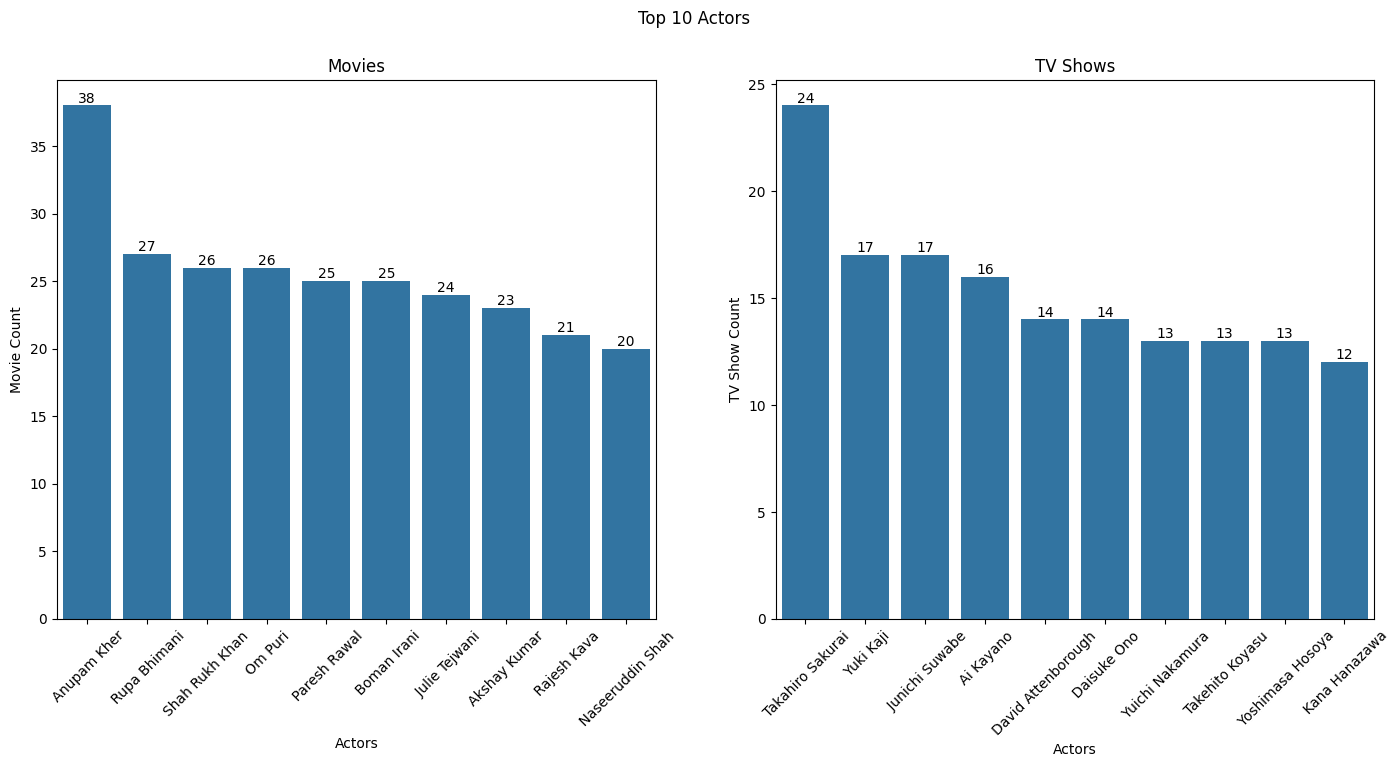

In [109]:
df_movies_temp = df_movies.drop_duplicates(subset = ['Actors','title'])
df_tvs_temp = df_tv.drop_duplicates(subset = ['Actors','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Actors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='Actors', order = df_movies_temp['Actors'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='Actors', order = df_tvs_temp['Actors'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('TV Show Count')

plt.show()

Lets see the correlation in our data.



<ipython-input-110-930dcdff5b82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), cmap = 'Blues', annot=True)


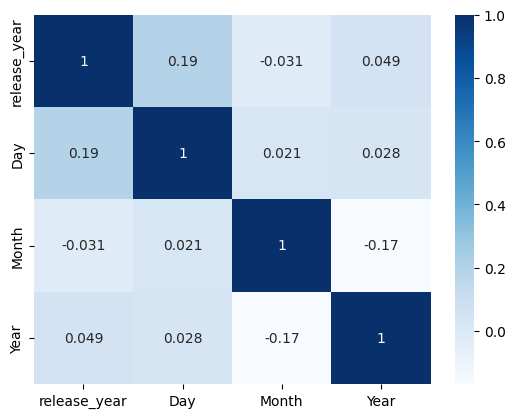

In [110]:
sns.heatmap(df_final.corr(), cmap = 'Blues', annot=True)
plt.show()

Lets see distribution of genre and rating among themselves.



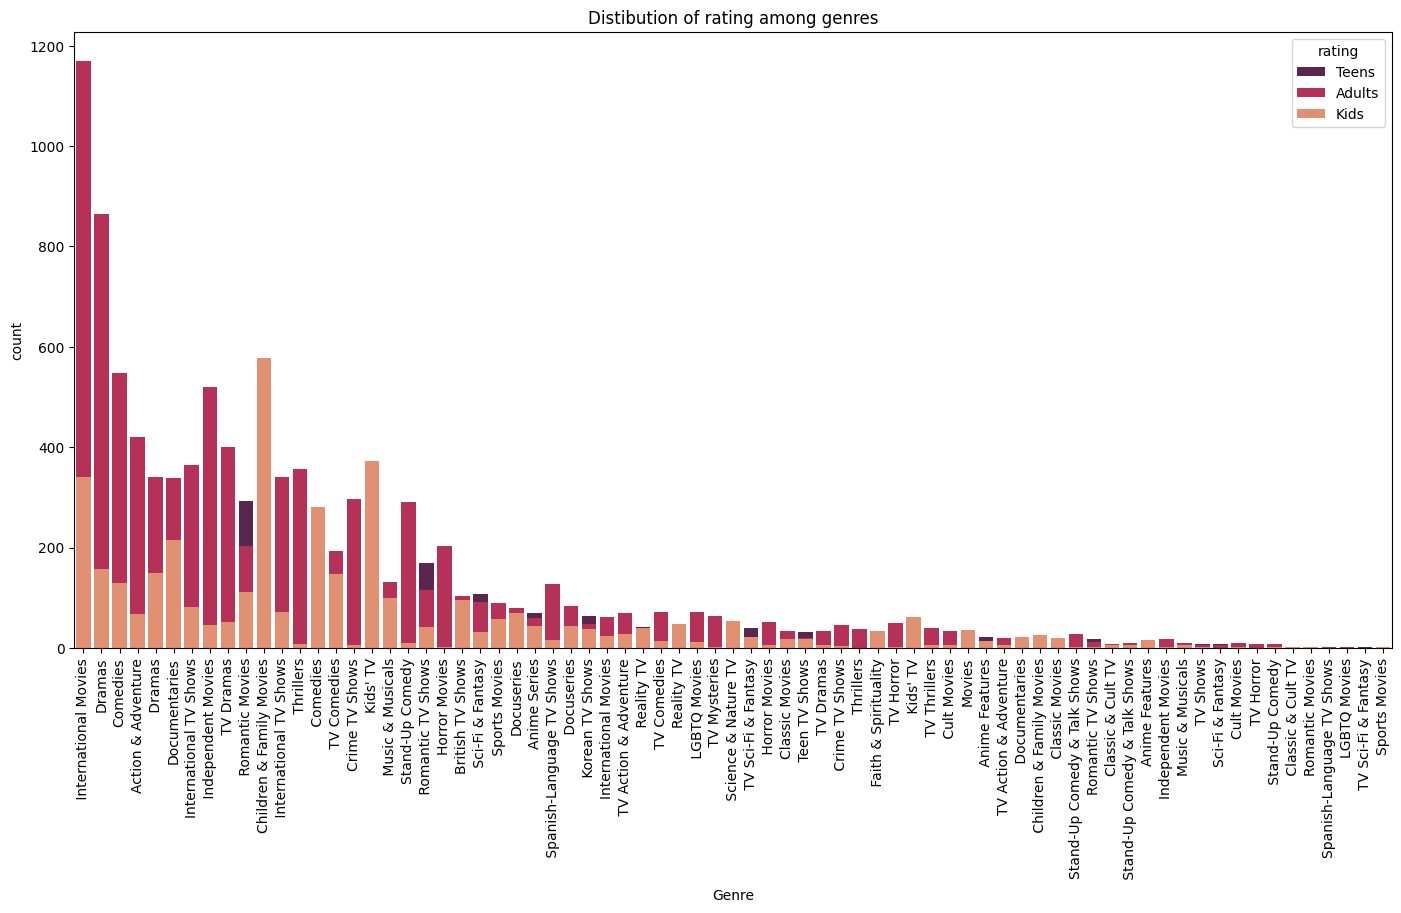

In [111]:
df_temp = df_final.drop_duplicates(subset = ['Genre','title'])

plt.figure(figsize=(17,8))
plt.title('Distibution of rating among genres')
sns.countplot(data=df_temp, x='Genre', hue = 'rating', dodge=False, order = df_temp['Genre'].value_counts().index, palette='rocket')
plt.xticks(rotation=90)
plt.show()

Lets see countrywise content rating classification.








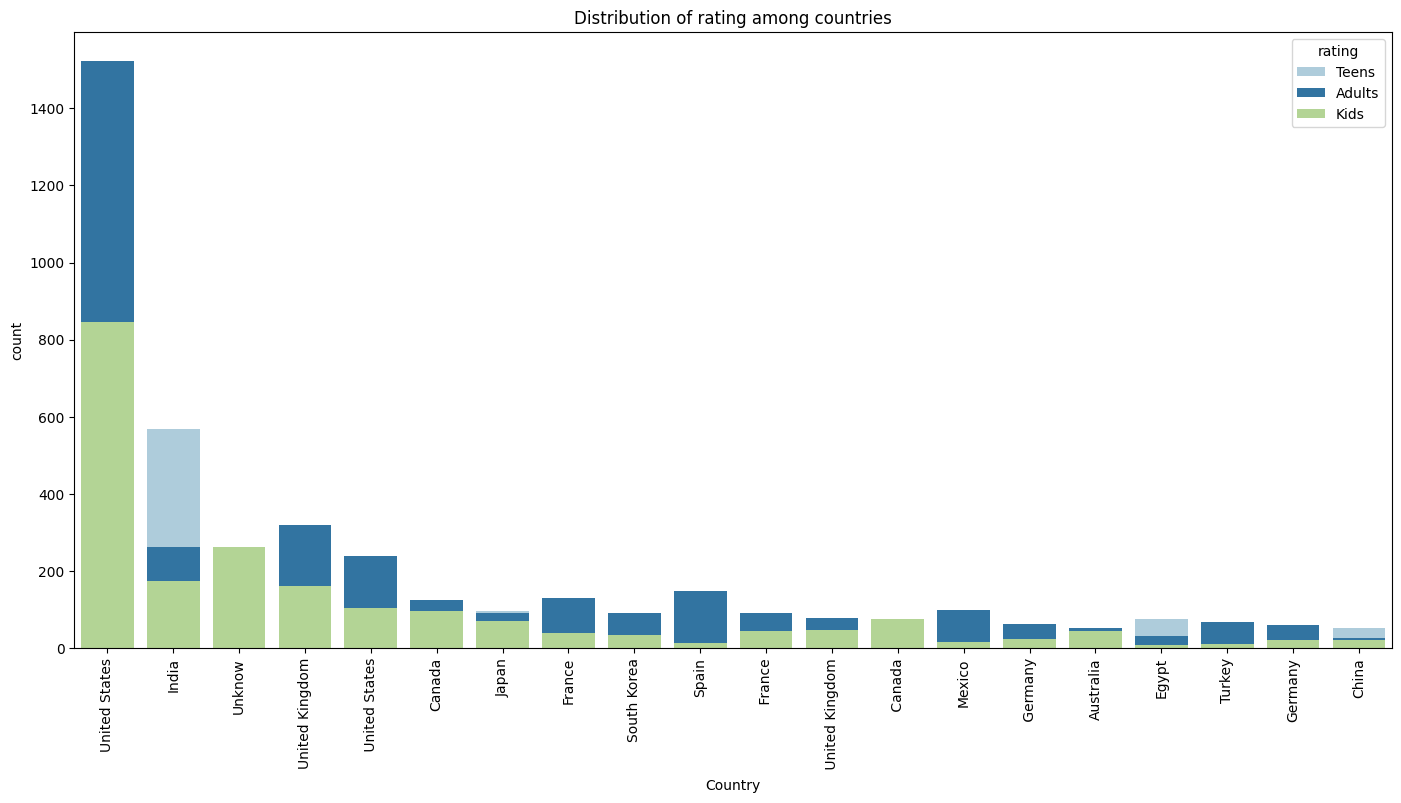

In [112]:
df_temp = df_final.drop_duplicates(subset = ['Country','title'])

plt.figure(figsize=(17,8))
plt.title('Distribution of rating among countries')
sns.countplot(data=df_temp, x='Country', hue = 'rating', dodge=False, order = df_temp['Country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()
